  CO_OPERADOR NO_OPERADOR  CO_SENHA  NI_OPERADOR CO_SENHA_ESTORNO  \
0       CAIXA        None     ª?¬¿;            1          ª?¬¿;Â³   
1      CAIXA1        None    ª?¬¿;Â            3             None   
2  ENTREGADOR  ENTREGADOR      None            4             None   
3  CATEDRAL10  CATEDRAL10  ÚLÕÕLÇµH            4             None   
4     DANIELA        None   ­?«®?¿Â            3             None   

   VR_MAX_DESC_OPERADOR IC_OPCAO_TELA_TOUCH                          CO_CAMPO  \
0                   NaN                   3                              None   
1                   0.0                None                              None   
2                   0.0                None                              None   
3                   0.0                None                              None   
4                  10.0                None  c5f4f6dd5eda0bb8b2c323d8eb73a089   

   IC_ATIVO  
0         1  
1         1  
2         1  
3         1  
4         1  
         CO_OP

c:\Users\suporte10\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\suporte10\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\suporte10\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\suporte10\AppData\Local\Programs\Python\Python310\lib\site

<AxesSubplot:ylabel='Vendas'>

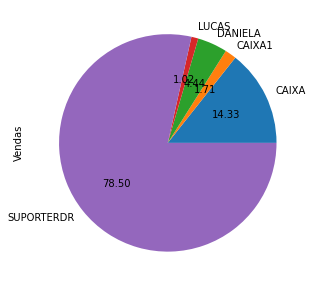

In [2]:
#importando firebird e pandas
import firebirdsql
import pandas as pd
import matplotlib


#conexão ao banco de dados
con = firebirdsql.Connection(user='SYSDBA', 
password='Laika06', 
database='C:\\RDR\DADOS\\Catedral.FDB', 
host="localhost", charset="ansi")


cur=con.cursor()
""""
cur.execute('select * from sistb001_operador')

for c in cur.fetchall():
    print(c)
print('Finalizado')    """ 

#query no banco de dados
df = pd.read_sql_query("select * from sistb001_operador",con)
print(df.head())

df_index = pd.read_sql_query("select * from sistb001_operador", con, index_col="IC_ATIVO")
print(df_index.head())

query = '''
SELECT f.no_funcionario,
       fu.no_funcao

FROM sistb011_funcionario f
INNER JOIN sistb009_funcao fu
ON f.nu_funcao = fu.nu_funcao;

'''

df = pd.read_sql_query (query, con)
print(df.head())

query_venda_funcionario = '''
SELECT v.co_operador, count(*)FROM sistb007_venda v
GROUP BY v.co_operador
ORDER BY count(*) DESC;
'''

venda = pd.read_sql_query(query_venda_funcionario, con)
print(venda.head())

funcionarios_venda = venda.groupby('CO_OPERADOR')['COUNT'].mean()
funcionarios_venda.head().plot(kind='pie', autopct='%0.2f', figsize=(5,5), label='Vendas')